In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
IMG_SIZE=224
BATCH_SIZE=32

In [5]:
train_datagen =ImageDataGenerator(rescale=1./255,validation_split=0.2)

In [7]:
train_generator=train_datagen.flow_from_directory(
    '/content/drive/MyDrive/brain_tumor_dataset/Train',
    target_size=(IMG_SIZE,IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training'
)

Found 915 images belonging to 2 classes.


In [8]:
val_generator=train_datagen.flow_from_directory(
    '/content/drive/MyDrive/brain_tumor_dataset/Train',
    target_size=(IMG_SIZE,IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation'

)

Found 227 images belonging to 2 classes.


In [13]:
model=keras.Sequential([
    layers.Conv2D(32,(3,3),activation='relu',input_shape=(IMG_SIZE,IMG_SIZE,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128,(3,3,),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(1,activation='sigmoid')
])




/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,089 (42.61 MB)

 Trainable params: 11,169,089 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [18]:
model.fit(train_generator,epochs=5,validation_data=val_generator,batch_size=BATCH_SIZE)


Epoch 1/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 117s 4s/step - accuracy: 0.9760 - loss: 0.0673 - val_accuracy: 0.8678 - val_loss: 0.2857
Epoch 2/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 115s 4s/step - accuracy: 0.9917 - loss: 0.0473 - val_accuracy: 0.9163 - val_loss: 0.2324
Epoch 3/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 145s 4s/step - accuracy: 0.9978 - loss: 0.0180 - val_accuracy: 0.9427 - val_loss: 0.1740
Epoch 4/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 120s 4s/step - accuracy: 0.9910 - loss: 0.0229 - val_accuracy: 0.9119 - val_loss: 0.2734
Epoch 5/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 115s 4s/step - accuracy: 0.9953 - loss: 0.0256 - val_accuracy: 0.8458 - val_loss: 0.5431


In [20]:
model.save('/content/drive/MyDrive/BRAINTUMOR.h5')

In [25]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
model=load_model('/content/drive/MyDrive/BRAINTUMOR.h5')
print("model loaded")

model loaded


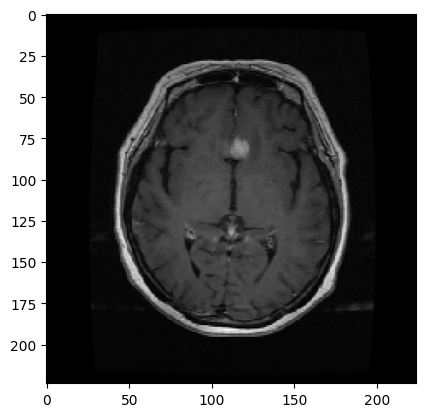

In [28]:
test_image_path="/content/drive/MyDrive/brain_tumor_dataset/Train/yes/Y1716.jpg"
img=image.load_img(test_image_path,target_size=(224,224))
plt.imshow(img)
plt.axis()
plt.show()

In [29]:
img_array=image.img_to_array(img)
img_array=np.expand_dims(img_array,axis=0)
img_array/=255

In [30]:
prediction=model.predict(img_array)
print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
[[1.]]


In [31]:
if prediction >= 0.5:
  print("you have a brain tumor")
else:
  print("you dont have a brain tumor")

you have a brain tumor
